# Single Layer Perceptron (SLP)

**MNIST DIGITS**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support

In [2]:
# Load Dataset

train = pd.read_csv("/kaggle/input/mnist-in-csv/mnist_train.csv").values
test = pd.read_csv("/kaggle/input/mnist-in-csv/mnist_test.csv").values

Epoch 1/10, Loss: 1.2494
Epoch 2/10, Loss: 0.7063
Epoch 3/10, Loss: 0.5814
Epoch 4/10, Loss: 0.5214
Epoch 5/10, Loss: 0.4847
Epoch 6/10, Loss: 0.4594
Epoch 7/10, Loss: 0.4407
Epoch 8/10, Loss: 0.4260
Epoch 9/10, Loss: 0.4142
Epoch 10/10, Loss: 0.4045
Training Time: 3.41 seconds
Accuracy: 90.00%
Precision: 90.00%
Recall: 90.00%
F1 Score: 89.96%


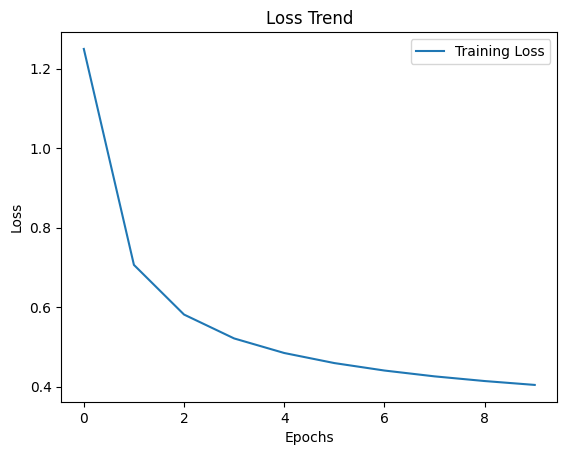

In [3]:
# Split into features and labels
X_train, y_train = train[:, 1:] / 255.0, train[:, 0]
X_test, y_test = test[:, 1:] / 255.0, test[:, 0]

# One-hot encoding of labels
def one_hot_encode(y, num_classes=10):
    return np.eye(num_classes)[y]

y_train_oh = one_hot_encode(y_train)
y_test_oh = one_hot_encode(y_test)

# Initialize weights and biases
input_size = X_train.shape[1]
output_size = 10
W = np.random.randn(input_size, output_size) * 0.01
b = np.zeros((1, output_size))

# Define softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Define cross-entropy loss
def cross_entropy_loss(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-9), axis=1))

# Training parameters
lr = 0.01
epochs = 10
batch_size = 128
loss_history = []

# Training loop
start_time = time.time()
for epoch in range(epochs):
    shuffle_idx = np.random.permutation(len(X_train))
    X_train, y_train_oh = X_train[shuffle_idx], y_train_oh[shuffle_idx]
    
    total_loss = 0
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train_oh[i:i+batch_size]
        
        # Forward pass
        logits = np.dot(X_batch, W) + b
        y_pred = softmax(logits)
        
        # Compute loss
        loss = cross_entropy_loss(y_batch, y_pred)
        total_loss += loss
        
        # Backward pass
        grad_W = np.dot(X_batch.T, (y_pred - y_batch)) / batch_size
        grad_b = np.mean(y_pred - y_batch, axis=0, keepdims=True)
        
        # Update weights
        W -= lr * grad_W
        b -= lr * grad_b
    
    loss_history.append(total_loss / (len(X_train) // batch_size))
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss_history[-1]:.4f}")

training_time = time.time() - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Predictions on test set
test_logits = np.dot(X_test, W) + b
y_test_pred = np.argmax(softmax(test_logits), axis=1)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred) * 100
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
precision *= 100
recall *= 100
f1 *= 100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

# Plot loss trend
plt.plot(loss_history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Trend')
plt.legend()
plt.show()


**MNIST FASHION**

In [4]:
mnist_fashion_train = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_train.csv").values
mnist_fashion_test = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_test.csv").values

Epoch 1/10, Loss: 1.1507
Epoch 2/10, Loss: 0.7785
Epoch 3/10, Loss: 0.6938
Epoch 4/10, Loss: 0.6480
Epoch 5/10, Loss: 0.6176
Epoch 6/10, Loss: 0.5958
Epoch 7/10, Loss: 0.5789
Epoch 8/10, Loss: 0.5652
Epoch 9/10, Loss: 0.5542
Epoch 10/10, Loss: 0.5444
Training Time: 3.39 seconds
Accuracy: 82.63%
Precision: 82.59%
Recall: 82.63%
F1 Score: 82.31%


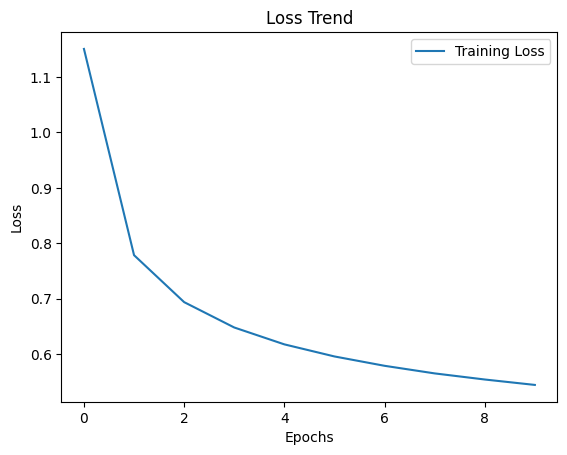

In [5]:
# Split into features and labels
X_train, y_train = mnist_fashion_train[:, 1:] / 255.0, mnist_fashion_train[:, 0]
X_test, y_test = mnist_fashion_test[:, 1:] / 255.0, mnist_fashion_test[:, 0]

# One-hot encoding of labels
def one_hot_encode(y, num_classes=10):
    return np.eye(num_classes)[y]

y_train_oh = one_hot_encode(y_train)
y_test_oh = one_hot_encode(y_test)

# Initialize weights and biases
input_size = X_train.shape[1]
output_size = 10
W = np.random.randn(input_size, output_size) * 0.01
b = np.zeros((1, output_size))

# Define softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Define cross-entropy loss
def cross_entropy_loss(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-9), axis=1))

# Training parameters
lr = 0.01
epochs = 10
batch_size = 128
loss_history = []

# Training loop
start_time = time.time()
for epoch in range(epochs):
    shuffle_idx = np.random.permutation(len(X_train))
    X_train, y_train_oh = X_train[shuffle_idx], y_train_oh[shuffle_idx]
    
    total_loss = 0
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train_oh[i:i+batch_size]
        
        # Forward pass
        logits = np.dot(X_batch, W) + b
        y_pred = softmax(logits)
        
        # Compute loss
        loss = cross_entropy_loss(y_batch, y_pred)
        total_loss += loss
        
        # Backward pass
        grad_W = np.dot(X_batch.T, (y_pred - y_batch)) / batch_size
        grad_b = np.mean(y_pred - y_batch, axis=0, keepdims=True)
        
        # Update weights
        W -= lr * grad_W
        b -= lr * grad_b
    
    loss_history.append(total_loss / (len(X_train) // batch_size))
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss_history[-1]:.4f}")

training_time = time.time() - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Predictions on test set
test_logits = np.dot(X_test, W) + b
y_test_pred = np.argmax(softmax(test_logits), axis=1)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred) * 100
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
precision *= 100
recall *= 100
f1 *= 100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

# Plot loss trend
plt.plot(loss_history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Trend')
plt.legend()
plt.show()

**CIFAR10**

Epoch 10/50 - Loss: 0.6755
Epoch 20/50 - Loss: 0.6634
Epoch 30/50 - Loss: 0.6587
Epoch 40/50 - Loss: 0.6564
Epoch 50/50 - Loss: 0.6550

Training Completed in 29.14 seconds.

📌 Test Accuracy: 11.28%
📌 Precision: 0.2642
📌 Recall: 0.1128
📌 F1 Score: 0.0423


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


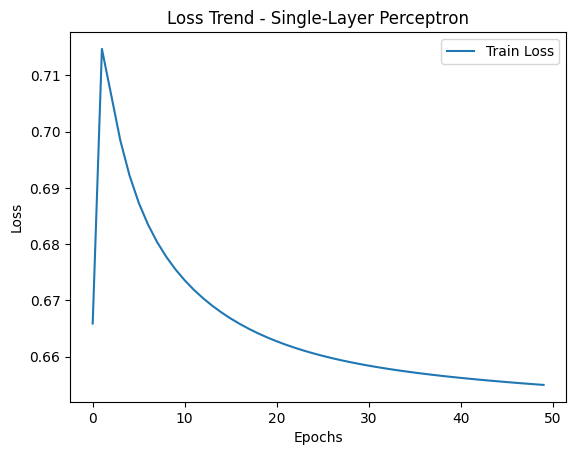

In [6]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

# CIFAR-10 dataset directories
cifar_train = "/kaggle/input/cifar10-pngs-in-folders/cifar10/train"
cifar_test = "/kaggle/input/cifar10-pngs-in-folders/cifar10/test"

# Image Size
IMG_SIZE = 32 * 32 * 3  # Flattened size
NUM_CLASSES = 10        # CIFAR-10 has 10 classes

# Function to Load Dataset
def load_cifar10_data(data_dir):
    images, labels = [], []
    class_names = sorted(os.listdir(data_dir))  # Class folders
    
    for class_idx, class_name in enumerate(class_names):
        class_path = os.path.join(data_dir, class_name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = load_img(img_path, target_size=(32, 32))  # Load image
            img = img_to_array(img) / 255.0  # Normalize to [0,1]
            images.append(img.flatten())  # Flatten image
            labels.append(class_idx)
    
    return np.array(images), np.array(labels), class_names

# Load Training & Testing Data
X_train, y_train, class_names = load_cifar10_data(cifar_train)
X_test, y_test, _ = load_cifar10_data(cifar_test)

# Convert Labels to One-Hot Encoding
y_train_onehot = to_categorical(y_train, NUM_CLASSES)
y_test_onehot = to_categorical(y_test, NUM_CLASSES)

# Initialize Weights & Bias
np.random.seed(42)
W = np.random.randn(IMG_SIZE, NUM_CLASSES) * 0.01  # Small random weights
b = np.zeros((1, NUM_CLASSES))  # Bias initialized to zero

# Softmax Activation
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Prevent overflow
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Cross-Entropy Loss
def cross_entropy_loss(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-9), axis=1))  # Avoid log(0)

# Training Parameters
learning_rate = 0.001
epochs = 50
batch_size = 128
num_samples = X_train.shape[0]
loss_history = []

# Training Loop
start_time = time.time()
for epoch in range(epochs):
    epoch_loss = 0
    
    # Mini-Batch Gradient Descent
    for i in range(0, num_samples, batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train_onehot[i:i+batch_size]

        # Forward Pass
        logits = np.dot(X_batch, W) + b  # Linear transformation
        y_pred = softmax(logits)  # Apply Softmax

        # Compute Loss
        loss = cross_entropy_loss(y_batch, y_pred)
        epoch_loss += loss

        # Backward Pass
        dL_dZ = (y_pred - y_batch) / batch_size  # Gradient of loss w.r.t logits
        dW = np.dot(X_batch.T, dL_dZ)  # Gradient of loss w.r.t weights
        db = np.sum(dL_dZ, axis=0, keepdims=True)  # Gradient of loss w.r.t bias

        # Update Weights & Bias
        W -= learning_rate * dW
        b -= learning_rate * db

    # Store Loss for Plotting
    loss_history.append(epoch_loss / (num_samples / batch_size))
    
    # Print Progress
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs} - Loss: {loss_history[-1]:.4f}")

# Training Time
train_time = time.time() - start_time
print(f"\nTraining Completed in {train_time:.2f} seconds.")

# Evaluate on Test Data
logits_test = np.dot(X_test, W) + b
y_pred_probs = softmax(logits_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Metrics Calculation
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="macro")

# Display Results
print(f"\n📌 Test Accuracy: {accuracy * 100:.2f}%")
print(f"📌 Precision: {precision:.4f}")
print(f"📌 Recall: {recall:.4f}")
print(f"📌 F1 Score: {f1:.4f}")

# Plot Loss Trend
plt.plot(loss_history, label="Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Trend - Single-Layer Perceptron")
plt.legend()
plt.show()


# Multi Layer Perceptron (MLP)



Training on MNIST dataset
Epoch 1/10, Loss: 0.0402
Epoch 2/10, Loss: 0.0328
Epoch 3/10, Loss: 0.0294
Epoch 4/10, Loss: 0.0273
Epoch 5/10, Loss: 0.0254
Epoch 6/10, Loss: 0.0240
Epoch 7/10, Loss: 0.0226
Epoch 8/10, Loss: 0.0210
Epoch 9/10, Loss: 0.0198
Epoch 10/10, Loss: 0.0188
Train Accuracy: 94.68% | Precision: 94.69% | Recall: 94.68% | F1 Score: 94.67%
Test Accuracy: 94.51% | Precision: 94.51% | Recall: 94.51% | F1 Score: 94.50%


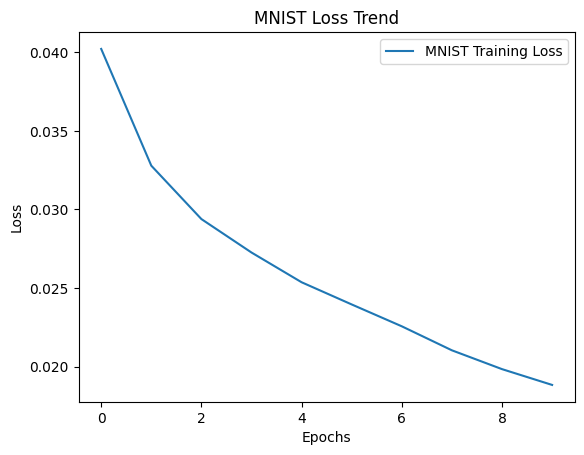

In [7]:
# Load datasets
mnist_train = pd.read_csv("/kaggle/input/mnist-in-csv/mnist_train.csv").values
mnist_test = pd.read_csv("/kaggle/input/mnist-in-csv/mnist_test.csv").values
fashion_train = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_train.csv").values
fashion_test = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_test.csv").values

def preprocess_data(train, test):
    X_train, y_train = train[:, 1:] / 255.0, train[:, 0]
    X_test, y_test = test[:, 1:] / 255.0, test[:, 0]
    return X_train, X_test, one_hot_encode(y_train), one_hot_encode(y_test), y_train, y_test

def one_hot_encode(y, num_classes=10):
    return np.eye(num_classes)[y]

class MLP:
    def __init__(self, input_size, hidden_size, output_size, lr=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lr = lr
        
        # Xavier Initialization
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(1 / input_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(1 / hidden_size)
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2

    def backward(self, X, y, output):
        m = y.shape[0]
        dz2 = output - y
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        dz1 = np.dot(dz2, self.W2.T) * self.sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

    def train(self, X, y, epochs=10, batch_size=64):
        loss_history = []
        for epoch in range(epochs):
            indices = np.arange(X.shape[0])
            np.random.shuffle(indices)
            X, y = X[indices], y[indices]
            
            for i in range(0, X.shape[0], batch_size):
                X_batch, y_batch = X[i:i+batch_size], y[i:i+batch_size]
                output = self.forward(X_batch)
                self.backward(X_batch, y_batch, output)
            
            loss = -np.mean(y * np.log(self.forward(X) + 1e-9))
            loss_history.append(loss)
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")
        return loss_history

    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

    def evaluate(self, X, y_true, y_labels):
        y_pred = self.predict(X)
        accuracy = accuracy_score(y_labels, y_pred) * 100
        precision, recall, f1, _ = precision_recall_fscore_support(y_labels, y_pred, average='weighted')
        return accuracy, precision * 100, recall * 100, f1 * 100

def run_experiment(X_train, X_test, y_train, y_test, y_train_labels, y_test_labels, dataset_name):
    print(f"\nTraining on {dataset_name} dataset")
    mlp = MLP(input_size=784, hidden_size=128, output_size=10, lr=0.1)
    loss_history = mlp.train(X_train, y_train, epochs=10, batch_size=64)
    train_acc, train_prec, train_rec, train_f1 = mlp.evaluate(X_train, y_train, y_train_labels)
    test_acc, test_prec, test_rec, test_f1 = mlp.evaluate(X_test, y_test, y_test_labels)
    
    print(f"Train Accuracy: {train_acc:.2f}% | Precision: {train_prec:.2f}% | Recall: {train_rec:.2f}% | F1 Score: {train_f1:.2f}%")
    print(f"Test Accuracy: {test_acc:.2f}% | Precision: {test_prec:.2f}% | Recall: {test_rec:.2f}% | F1 Score: {test_f1:.2f}%")
    
    plt.plot(loss_history, label=f'{dataset_name} Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{dataset_name} Loss Trend')
    plt.legend()
    plt.show()

# Preprocess both datasets
X_train_mnist, X_test_mnist, y_train_mnist, y_test_mnist, y_train_labels_mnist, y_test_labels_mnist = preprocess_data(mnist_train, mnist_test)
X_train_fashion, X_test_fashion, y_train_fashion, y_test_fashion, y_train_labels_fashion, y_test_labels_fashion = preprocess_data(fashion_train, fashion_test)

# Run experiments
run_experiment(X_train_mnist, X_test_mnist, y_train_mnist, y_test_mnist, y_train_labels_mnist, y_test_labels_mnist, "MNIST")



Training on Fashion-MNIST dataset
Epoch 1/10, Loss: 0.0577
Epoch 2/10, Loss: 0.0499
Epoch 3/10, Loss: 0.0462
Epoch 4/10, Loss: 0.0460
Epoch 5/10, Loss: 0.0445
Epoch 6/10, Loss: 0.0411
Epoch 7/10, Loss: 0.0400
Epoch 8/10, Loss: 0.0385
Epoch 9/10, Loss: 0.0391
Epoch 10/10, Loss: 0.0375
Train Accuracy: 86.81% | Precision: 86.90% | Recall: 86.81% | F1 Score: 86.75%
Test Accuracy: 86.33% | Precision: 86.33% | Recall: 86.33% | F1 Score: 86.24%


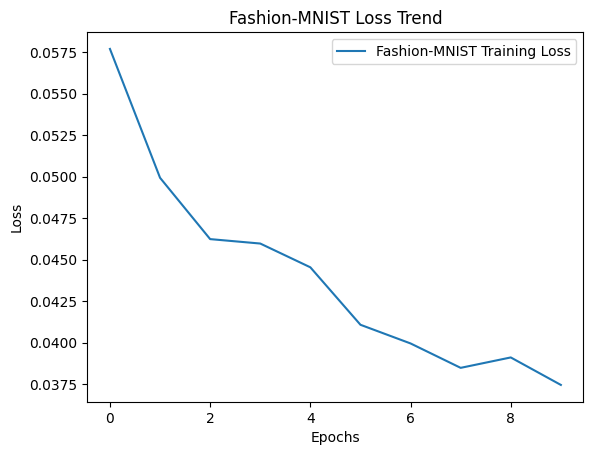

In [8]:
run_experiment(X_train_fashion, X_test_fashion, y_train_fashion, y_test_fashion, y_train_labels_fashion, y_test_labels_fashion, "Fashion-MNIST")


Epoch 1/10, Loss: 2.1551
Epoch 2/10, Loss: 1.9400
Epoch 3/10, Loss: 1.8554
Epoch 4/10, Loss: 1.7961
Epoch 5/10, Loss: 1.7473
Epoch 6/10, Loss: 1.7066
Epoch 7/10, Loss: 1.6711
Epoch 8/10, Loss: 1.6398
Epoch 9/10, Loss: 1.6148
Epoch 10/10, Loss: 1.5922
Training Time: 24.35 seconds
Accuracy: 0.4310
Precision: 0.4341
Recall: 0.4310
F1 Score: 0.4176


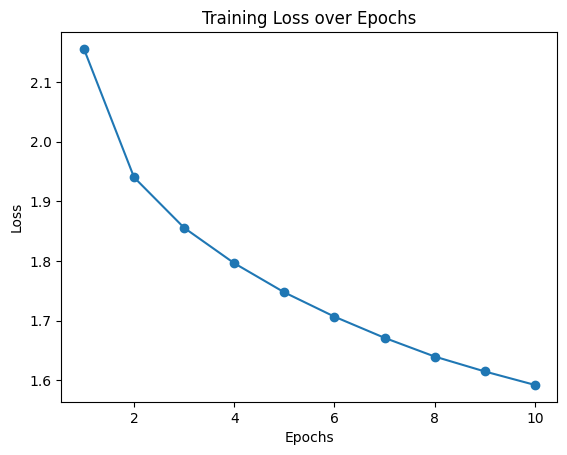

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from PIL import Image

# Load dataset
def load_data(data_dir):
    X, y = [], []
    class_names = sorted(os.listdir(data_dir))  # Get class names
    class_to_idx = {cls: i for i, cls in enumerate(class_names)}
    
    for cls in class_names:
        class_path = os.path.join(data_dir, cls)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = Image.open(img_path).convert("RGB")
            X.append(np.array(img).flatten() / 255.0)  # Normalize
            y.append(class_to_idx[cls])
    
    return np.array(X), np.array(y), class_names

# MLP Implementation
class MLP:
    def __init__(self, input_size, hidden_size, output_size, lr=0.01):
        self.lr = lr
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def relu(self, x):
        return np.maximum(0, x)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def forward(self, X):
        self.Z1 = X @ self.W1 + self.b1
        self.A1 = self.relu(self.Z1)
        self.Z2 = self.A1 @ self.W2 + self.b2
        self.A2 = self.softmax(self.Z2)
        return self.A2

    def backward(self, X, y, output):
        m = y.shape[0]
        y_one_hot = np.eye(10)[y]
        dZ2 = output - y_one_hot
        dW2 = (self.A1.T @ dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = dZ2 @ self.W2.T
        dZ1 = dA1 * (self.Z1 > 0)
        dW1 = (X.T @ dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

    def compute_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        y_one_hot = np.eye(10)[y_true]
        loss = -np.sum(y_one_hot * np.log(y_pred + 1e-8)) / m
        return loss

# Load data
cifar_train = "/kaggle/input/cifar10-pngs-in-folders/cifar10/train"
cifar_test = "/kaggle/input/cifar10-pngs-in-folders/cifar10/test"
X_train, y_train, class_names = load_data(cifar_train)
X_test, y_test, _ = load_data(cifar_test)

# Model initialization
input_size = 32 * 32 * 3  # CIFAR-10 images are 32x32x3
hidden_size = 128
output_size = 10
lr = 0.01

mlp = MLP(input_size, hidden_size, output_size, lr)

# Training
epochs = 10
batch_size = 64
epoch_losses = []
start_time = time.time()

for epoch in range(epochs):
    perm = np.random.permutation(len(X_train))
    X_train, y_train = X_train[perm], y_train[perm]
    epoch_loss = 0
    
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        output = mlp.forward(X_batch)
        mlp.backward(X_batch, y_batch, output)
        loss = mlp.compute_loss(y_batch, output)
        epoch_loss += loss
    
    epoch_loss /= (len(X_train) // batch_size)
    epoch_losses.append(epoch_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")

training_time = time.time() - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Evaluation
predictions = np.argmax(mlp.forward(X_test), axis=1)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot Training Loss
plt.plot(range(1, epochs + 1), epoch_losses, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.show()


# CNN Implementation


**MNIST DIGITS & FASHION MNIST**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8704 - loss: 0.4266 - val_accuracy: 0.9816 - val_loss: 0.0561
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9837 - loss: 0.0533 - val_accuracy: 0.9881 - val_loss: 0.0365
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9884 - loss: 0.0370 - val_accuracy: 0.9884 - val_loss: 0.0376
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9913 - loss: 0.0280 - val_accuracy: 0.9894 - val_loss: 0.0339
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9929 - loss: 0.0219 - val_accuracy: 0.9918 - val_loss: 0.0257
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MNIST Test Accuracy: 99.18%
MNIST Precision: 99.1812%
MNIST Recall: 99.1800%
MNIST F1 Score: 99.1798%


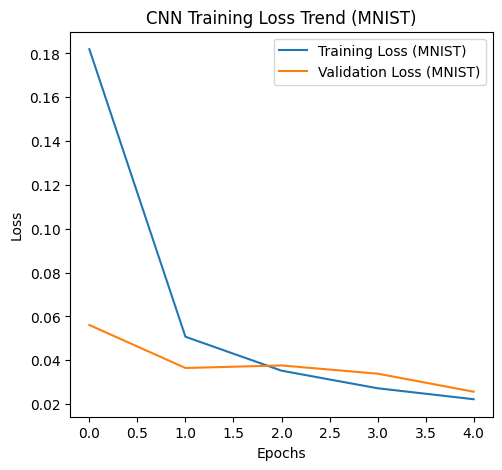

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load datasets
mnist_train = pd.read_csv("/kaggle/input/mnist-in-csv/mnist_train.csv").values
mnist_test = pd.read_csv("/kaggle/input/mnist-in-csv/mnist_test.csv").values

mnist_fashion_train = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_train.csv").values
mnist_fashion_test = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_test.csv").values

# Preprocess Data
def preprocess_data(train, test):
    X_train, y_train = train[:, 1:].reshape(-1, 28, 28, 1) / 255.0, train[:, 0]
    X_test, y_test = test[:, 1:].reshape(-1, 28, 28, 1) / 255.0, test[:, 0]
    return X_train, X_test, y_train, y_test

X_train_mnist, X_test_mnist, y_train_mnist, y_test_mnist = preprocess_data(mnist_train, mnist_test)
X_train_fashion, X_test_fashion, y_train_fashion, y_test_fashion = preprocess_data(mnist_fashion_train, mnist_fashion_test)

# Build CNN Model
def create_cnn_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and Evaluate Model for MNIST
cmp_model_mnist = create_cnn_model()
history_mnist = cmp_model_mnist.fit(X_train_mnist, y_train_mnist, epochs=5, batch_size=64, validation_data=(X_test_mnist, y_test_mnist))

# Evaluate on test data (MNIST)
y_pred_mnist = np.argmax(cmp_model_mnist.predict(X_test_mnist), axis=1)
accuracy_mnist = accuracy_score(y_test_mnist, y_pred_mnist)
precision_mnist, recall_mnist, f1_mnist, _ = precision_recall_fscore_support(y_test_mnist, y_pred_mnist, average='weighted')

print(f'MNIST Test Accuracy: {accuracy_mnist * 100:.2f}%')
print(f'MNIST Precision: {precision_mnist*100:.4f}%')
print(f'MNIST Recall: {recall_mnist*100:.4f}%')
print(f'MNIST F1 Score: {f1_mnist*100:.4f}%')

# Plot Loss Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_mnist.history['loss'], label='Training Loss (MNIST)')
plt.plot(history_mnist.history['val_loss'], label='Validation Loss (MNIST)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN Training Loss Trend (MNIST)')
plt.legend()




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7131 - loss: 0.7867 - val_accuracy: 0.8712 - val_loss: 0.3648
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8747 - loss: 0.3527 - val_accuracy: 0.8906 - val_loss: 0.3038
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8906 - loss: 0.3011 - val_accuracy: 0.8945 - val_loss: 0.2930
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9043 - loss: 0.2623 - val_accuracy: 0.9059 - val_loss: 0.2630
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9115 - loss: 0.2402 - val_accuracy: 0.9056 - val_loss: 0.2603
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Fashion MNIST Test Accuracy: 90.56%
Fashion MNIST Precision: 90.6473%
Fashion MNIST Recall: 90.5600%
Fashion MNIST F1 Score: 90.3534%


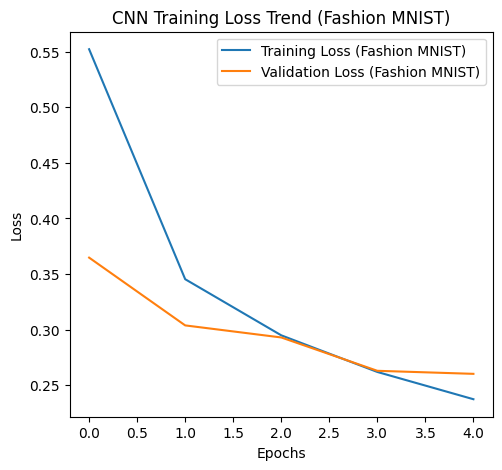

In [11]:
# Train and Evaluate Model for Fashion MNIST
cmp_model_fashion = create_cnn_model()
history_fashion = cmp_model_fashion.fit(X_train_fashion, y_train_fashion, epochs=5, batch_size=64, validation_data=(X_test_fashion, y_test_fashion))

# Evaluate on test data (Fashion MNIST)
y_pred_fashion = np.argmax(cmp_model_fashion.predict(X_test_fashion), axis=1)
accuracy_fashion = accuracy_score(y_test_fashion, y_pred_fashion)
precision_fashion, recall_fashion, f1_fashion, _ = precision_recall_fscore_support(y_test_fashion, y_pred_fashion, average='weighted')

print(f'Fashion MNIST Test Accuracy: {accuracy_fashion * 100:.2f}%')
print(f'Fashion MNIST Precision: {precision_fashion*100:.4f}%')
print(f'Fashion MNIST Recall: {recall_fashion*100:.4f}%')
print(f'Fashion MNIST F1 Score: {f1_fashion*100:.4f}%')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(history_fashion.history['loss'], label='Training Loss (Fashion MNIST)')
plt.plot(history_fashion.history['val_loss'], label='Validation Loss (Fashion MNIST)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN Training Loss Trend (Fashion MNIST)')
plt.legend()

plt.show()

**CIFAR-10**

In [12]:
cifar10_train = "/kaggle/input/cifar10-pngs-in-folders/cifar10/train"
cifar10_test = "/kaggle/input/cifar10-pngs-in-folders/cifar10/test"

Found 50000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 105ms/step - accuracy: 0.2724 - loss: 2.2401 - val_accuracy: 0.4764 - val_loss: 1.4154 - learning_rate: 0.0010
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 98ms/step - accuracy: 0.4682 - loss: 1.4674 - val_accuracy: 0.5215 - val_loss: 1.3219 - learning_rate: 0.0010
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 101ms/step - accuracy: 0.5305 - loss: 1.3136 - val_accuracy: 0.6019 - val_loss: 1.1365 - learning_rate: 0.0010
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 99ms/step - accuracy: 0.5676 - loss: 1.2233 - val_accuracy: 0.5935 - val_loss: 1.1399 - learning_rate: 0.0010
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 97ms/step - accuracy: 0.5934 - loss: 1.1657 - val_accuracy: 0.5311 - val_loss: 1.4104 - learning_rate: 0.0010
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 97ms/step - accuracy: 0.6157 - loss: 1.1151 - val_accuracy: 0.6760 - val_loss: 0.9473 - learning_rate: 0.0010
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 99ms/step - accuracy: 0.6327 - loss: 1.05

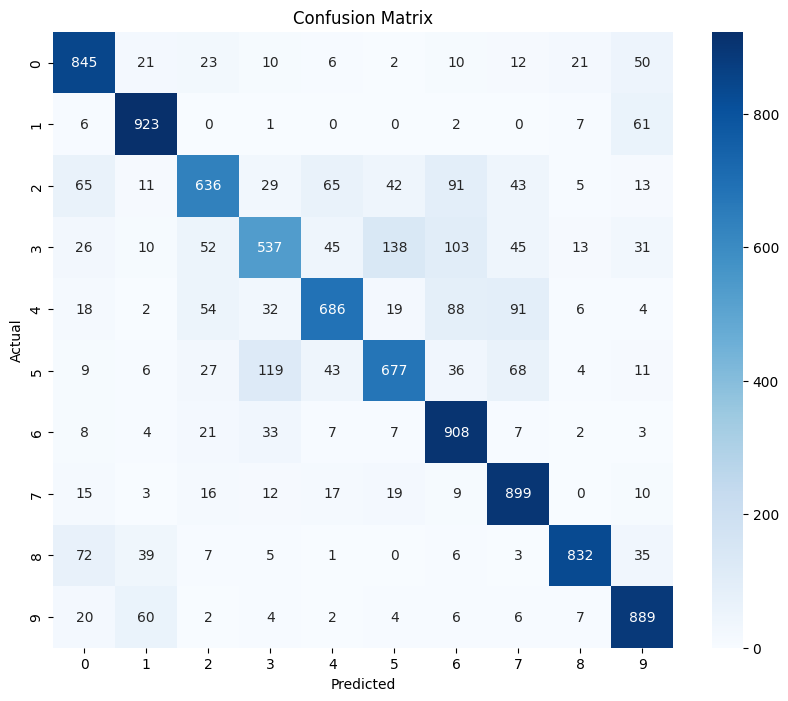

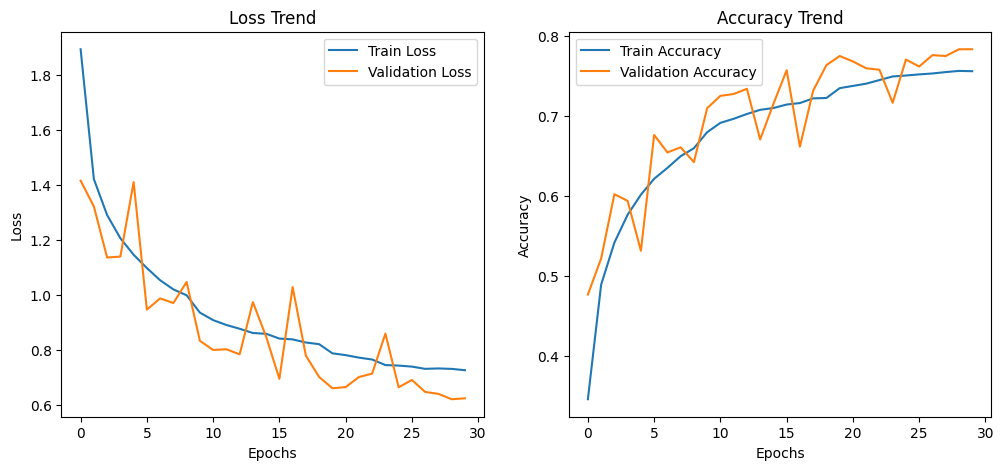

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# CIFAR-10 dataset directory
cifar_train_dir = "/kaggle/input/cifar10-pngs-in-folders/cifar10/train"
cifar_test_dir = "/kaggle/input/cifar10-pngs-in-folders/cifar10/test"

# 1️⃣ Data Preprocessing with Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    cifar_train_dir,
    target_size=(32, 32),
    batch_size=64,
    class_mode="categorical",
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    cifar_test_dir,
    target_size=(32, 32),
    batch_size=64,
    class_mode="categorical",
    shuffle=False
)

# 2️⃣ Improved LeNet-5 Model
model = keras.Sequential([
    # Conv Block 1
    layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Conv Block 2
    layers.Conv2D(64, (5, 5), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Fully Connected Layers
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(84, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')
])

# 3️⃣ Compile Model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# 4️⃣ Learning Rate Scheduler
lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', patience=3, factor=0.5, verbose=1
)

# 5️⃣ Train Model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    callbacks=[lr_scheduler]
)

# 6️⃣ Evaluate Model: Precision, Recall, F1-score
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification Report
print(classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys())))

# 7️⃣ Plot Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 8️⃣ Plot Loss & Accuracy Trends
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Trend")

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Trend")

plt.show()
